In [1]:
import torch

In [2]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [5]:
print("size: ", x.size())
print("shape: ", x.shape)
print("랭크 (차원): ", x.ndimension())

size:  torch.Size([3, 3])
shape:  torch.Size([3, 3])
랭크 (차원):  2


In [6]:
# 랭크 늘리기
x = torch.unsqueeze(x, 0)
print(x)
print("size: ", x.size())
print("shape: ", x.shape)
print("랭크 (차원): ", x.ndimension())

# 랭크가 늘어나도 텐서 속 원소의 수는 유지

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
size:  torch.Size([1, 3, 3])
shape:  torch.Size([1, 3, 3])
랭크 (차원):  3


In [7]:
# 랭크 줄이기
x = torch.squeeze(x)
print(x)
print("size: ", x.size())
print("shape: ", x.shape)
print("랭크 (차원): ", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
size:  torch.Size([3, 3])
shape:  torch.Size([3, 3])
랭크 (차원):  2


In [8]:
x = x.view(9)
print(x)
print("size: ", x.size())
print("shape: ", x.shape)
print("랭크 (차원): ", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
size:  torch.Size([9])
shape:  torch.Size([9])
랭크 (차원):  1


In [12]:
# 행렬 곱

w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

print('w size: ', w.size())
print('x size: ', x.size())

print('w : ', w)
print('x : ', x)

b = torch.randn(5,2, dtype=torch.float)
print('b size: ', b.size())
print('b : ', b)


w size:  torch.Size([5, 3])
x size:  torch.Size([3, 2])
w :  tensor([[ 0.8157, -1.3716, -0.2836],
        [ 0.9569, -0.6184,  0.7004],
        [-1.0735,  1.2073,  2.7927],
        [-0.2480, -1.7317, -0.1756],
        [ 0.1799, -0.3820,  1.3967]])
x :  tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
b size:  torch.Size([5, 2])
b :  tensor([[-0.6123,  0.9572],
        [ 0.6999,  0.4241],
        [-0.9978,  0.1575],
        [ 0.2561, -0.5796],
        [-0.8938,  1.1483]])


In [14]:
# 행렬곱은 torch.mm() 함수를 사용

wx = torch.mm(w, x) # w행은 5, x열은 2, 즉 shape는 [5, 2]
print('wx size : ', wx.size())
print('wx : ', wx)

result = wx + b
print('result size: ', result.size())
print('result: ', result)


wx size :  torch.Size([5, 2])
wx :  tensor([[-4.7172, -5.5567],
        [ 2.6036,  3.6425],
        [16.5120, 19.4386],
        [-6.3210, -8.4763],
        [ 6.0173,  7.2119]])
result size:  torch.Size([5, 2])
result:  tensor([[-5.3296, -4.5996],
        [ 3.3035,  4.0665],
        [15.5142, 19.5961],
        [-6.0649, -9.0559],
        [ 5.1234,  8.3602]])


In [18]:
# Autograd
w = torch.tensor(1.0, requires_grad=True)
a = w * 3
l = a**2

In [19]:
l.backward()
print('l을 w로 미분한 값은 {}'.format(w.grad))

l을 w로 미분한 값은 18.0


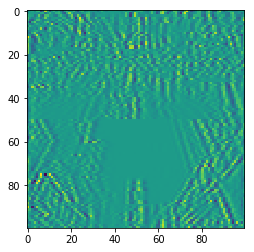

In [21]:
### 오염된 이미지 복원
import pickle
import matplotlib.pyplot as plt

broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'), encoding='latin1'))
plt.imshow(broken_image.view(100,100))


In [38]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [35]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image) # 두 텐서 사이의 거리를 구하는 함수

In [26]:
# 무작위 값을 가진 텐서를 생성
random_tensor = torch.randn(10000, dtype = torch.float)

In [27]:
# 매개변수 학습률 설정 (learning rate)
lr = 0.8


In [39]:
# 오차 함수를 random_tensor로 미분하기 위해 requires_grad를 설정
for i in range(0, 20000):
    random_tensor.requires_grad_(True)
    
    # 무작위 텐서를 (random_tensor) weird_function() 함수에 통과시켜 가설(hypothesis) 를 구함
    hypothesis = weird_function(random_tensor)

    # 오차를 계산
    loss = distance_loss(hypothesis, broken_image)

    # backward를 호출해 loss를 random_tensor로 미분
    loss.backward()
    
    # 파이토치는 신경만 모델 속 변수들이 지나가는 길인 그래프를 생성
    with torch.no_grad(): # 직접 경사하강법을 구현하기 때문에 파이토치에 자동 기울기 계산을 비활성
        # loss.backward() 로 계산한 loss의 기울기, 즉 loss가 최댓점이 되는 곳의 방향이 들어있음
        # 이 방향의 반대쪽으로 random_tensor를 학습률(lr) 만큼 이동
        random_tensor = random_tensor - lr * random_tensor.grad
        
    # 오차 출력
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))


Loss at 0 = 11.87472152709961
Loss at 1000 = 0.1788623183965683
Loss at 2000 = 0.13984555006027222
Loss at 3000 = 0.12065991759300232
Loss at 4000 = 0.10461539775133133
Loss at 5000 = 0.08966553956270218
Loss at 6000 = 0.07522895187139511
Loss at 7000 = 0.06107300892472267
Loss at 8000 = 0.047086045145988464
Loss at 9000 = 0.03320808708667755
Loss at 10000 = 0.02093958482146263
Loss at 11000 = 0.02116374857723713
Loss at 12000 = 0.021166838705539703
Loss at 13000 = 0.021167682483792305
Loss at 14000 = 0.021167704835534096
Loss at 15000 = 0.02116856724023819
Loss at 16000 = 0.02116750180721283
Loss at 17000 = 0.02116698957979679
Loss at 18000 = 0.021164700388908386
Loss at 19000 = 0.0211641825735569


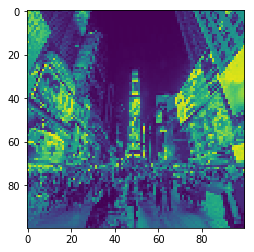

In [40]:

# 복원된 이미지 시각화
plt.imshow(random_tensor.view(100, 100).data)

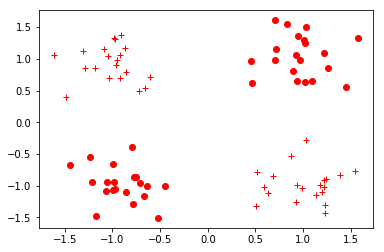

In [48]:
# 신경망 모델 구현
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plot
import torch.nn.functional as F

# 학습 평가에 사용할 데이터셋 만듬
n_dim = 2

# make_blobs 함수를 이용해 데이터를 2차원 벡터 형태로 만듬
# make_blobs 함수가 만들어내는 레이블 데이터는 각 데이터 한 점 한점이 몇 번째 클러스터에 속해 있는지 알려주는 인덱스

# 신경망 학습에 쓰이는 데이터와 레이블
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, 
                              centers=[[1,1], [-1,-1], [1,-1], [-1, 1]],
                              shuffle=True, cluster_std=0.3)

# 학습이 끝난 신경망의 성능을 평가하는데 쓰임
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, 
                              centers=[[1,1], [-1,-1], [1,-1], [-1, 1]],
                              shuffle=True, cluster_std=0.3)


def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_==f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

# 데이터가 제대로 만들어지고 레이블링 되어있는지 확인하기 위해 맷플롯립으로 시각화
def vis_data(x, y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [49]:
# 방금 생성한 넘파이 벡터 형식 데이터를 파이토치 텐서로 바꿔줌
x_train = torch.FloatTensor(x_train)
x_test =  torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test =  torch.FloatTensor(y_test)

In [55]:
# 신경망 모델 구현
# 신경망 모듈 상속하는 파이썬 클래스 
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # torch.nn.Linear 함수는 행렬곱과 편향을 포함하는 연산을 지원하는 객체 반환
        # relu 와 sigmoid는 각 단계에서 수행할 활성화 함수
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, input_tensor):
        """
        linear_1 은 입력데이터에 input_size, hidden_size 크기의 가중치를 행렬곱하고 편향을 더하여 
        [1, hidden_size] 꼴의 텐서를 반환
        
        이 텐서에 torch.nn.ReLU() 활성화 함수를 적용
        ReLU는 입력값이 0 보다 작으면 0, 0보다 크면 입력값을 그대로 출력
        
        ReLU 함수를 통과한 텐서는 linear_2로 정의된 행렬곱을 거쳐 [1,1] 로 변환
        
        마지막으로 sigmoid() 활성화 함수에 입력
        """

        linear1 = self.linear_1(input_tensor) 
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output
    

In [60]:
# 신경망 객체 생성하고 학습에 필요한 여러 변수와 알고리즘 정의
model = NeuralNet(2, 5) # input 2, hidden 5로 설정한 신경망
learning_rate = 0.03 # 학습률 설정
# 이진 교차 엔트로피 (binary cross entropy) 
criterion = torch.nn.BCELoss() # 오차함수

# 전체 학습 데이터를 총 몇번 모델에 입력할지 결정
epochs = 2000

# 학습에 최적화 알고리즘으로 확률적 경사하강법 (stochastic gradient descent: SGD) 선택
# 새 가중치 = 가중치 - 학습률 * 가중치에 대한 기울기
# optimizer 인스턴스 생성
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# optimizer는 step 함수를 부를 때마다 가중치를 학습률 만큼 갱싱
# model.parameter 함수로 추출한 모델 내부의 가중치와 학습률 입력

# 학습하지 않은 모델의 성능 시험
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

# item() 함수는 텐서 속의 숫자를 스칼라 값으로 반환
# 100번 찍어 lossd율 만큼 틀린다

Before Training, test loss is 0.7113457918167114


In [62]:
# 신경망을 학습하여 성능 개선 (기본적인 루틴)
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    train_output = model(x_train)
    
    # forward 함수가 결괏괎을 내는 함수이긴 하지만 torch.nn.module이 forward 함수를 호출해줌
    
    # 결괏값의 차원을 레이블 차원과 같게 만들고 오차를 계산
    train_loss = criterion(train_output.squeeze(), y_train)
    
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    
    # 오차 함수를 가중치로 미분하여 오차가 최소가 되는 방향을 구함
    # 이 두줄이 신경망 학습의 핵심인 역전파를 행하는 코드
    train_loss.backward()
    optimizer.step()
    

Train loss at 0 is 0.052985064685344696
Train loss at 100 is 0.0500851571559906
Train loss at 200 is 0.04747580736875534
Train loss at 300 is 0.04510398954153061
Train loss at 400 is 0.042938027530908585
Train loss at 500 is 0.04094969853758812
Train loss at 600 is 0.03912031278014183
Train loss at 700 is 0.03743068128824234
Train loss at 800 is 0.035865962505340576
Train loss at 900 is 0.03441191092133522
Train loss at 1000 is 0.033058229833841324
Train loss at 1100 is 0.031797152012586594
Train loss at 1200 is 0.03061923384666443
Train loss at 1300 is 0.029515638947486877
Train loss at 1400 is 0.02847994863986969
Train loss at 1500 is 0.02750679850578308
Train loss at 1600 is 0.02659076452255249
Train loss at 1700 is 0.025727171450853348
Train loss at 1800 is 0.024911897256970406
Train loss at 1900 is 0.024141203612089157


In [65]:
# 모델을 평가 모드로 변경
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

# 오차가 줄어든 것을 확인

After Training, test loss is 0.03633362799882889


In [66]:
# 학습된 모델을 state_dict() 함수 형태로 바꾸어 준 후 pt 파일로 저장
# state_dict 함수는 모델 내 가중치들이 딕셔너리 형태로 표현된 데이터
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model : {}'.format(model.state_dict()))

state_dict format of the model : OrderedDict([('linear_1.weight', tensor([[ 2.2291, -1.2938],
        [ 0.6034, -0.3526],
        [-1.5987,  2.4220],
        [ 1.4484,  1.5253],
        [ 1.1956, -0.8092]])), ('linear_1.bias', tensor([-0.3998, -0.1071, -0.4069,  0.0704, -0.3233])), ('linear_2.weight', tensor([[ 2.5129,  0.6177,  2.8080, -1.9651,  1.1037]])), ('linear_2.bias', tensor([-3.0945]))])


In [67]:
# 언제든 이 파일을 읽어서 새로운 신경망 객체에 이미 학습된 모델의 가중치를 적용할 수 있음
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))

<All keys matched successfully>

In [68]:
new_model.eval()
print('벡터 [-1, 1] 이 레이블 1을 가질 확률 {}'.format(new_model(torch.FloatTensor([-1, 1])).item()))

벡터 [-1, 1] 이 레이블 1을 가질 확률 0.9988462924957275
